In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [6]:
nb = pd.read_csv('Neighborhoods_Files/pgh_neighborhoods.csv')
nb = nb[['name']]
print(nb.head())

                 name
0  Marshall-Shadeland
1    South Side Flats
2   South Side Slopes
3           Arlington
4       Lincoln Place


In [7]:
pools = pd.read_csv('citypools.csv')
pools = pools['neighborhood'] # select only the neighborhood column
print(pools.head())
# we want to count how many instances of each neighborhood are in features. 
# This will be essentially be a 'leaderboard' of water features
nb['pools'] = pd.Series(0, index=np.arange(len(nb))) # we initialize the leaderboard to all 0's
for row in pools:
    # get neighborhood index 
    
    inds = nb[nb.name == row]
    if len(inds):
        ind = nb[nb.name == row].index[0] # which neighborhood does this feature belong to?
        nb.loc[ind,'pools'] += 1 # update accordingly"""
    
nb = nb.sort_values('pools', ascending=False) # we sort by highest first
print(nb)

0    Bedford Dwellings
1           Banksville
2            Beechview
3           Bloomfield
4            Hazelwood
Name: neighborhood, dtype: object
                     name  pools
1        South Side Flats      2
71          Highland Park      2
90       Mount Washington      1
14            Beltzhoover      1
48            Perry North      1
..                    ...    ...
36                   Hays      0
35        Terrace Village      0
34                Chateau      0
33        Crafton Heights      0
45  Spring Hill-City View      0

[91 rows x 2 columns]


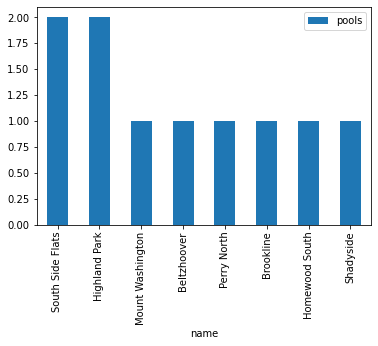

In [8]:
nb = nb[:8]
nb.plot.bar(x='name')